<div style="text-align: right"><b>Yasmin Buzari <br> INM430 - Principles of Data Science </br> </b></div>

# <center>Exploring Capital Bikeshare Commuting Behaviour </center> 
***

## Table of Contents

Data Loading <br>
Data processing and Feature Engineering <br>
Commuting Behaviour Analysis <br>
Bikeshare Station Analysis <br> 
Trip Duration Analysis
***


### Data Loading and Initial Observations

For our analysis, we will analyze bikeshare trips over a year by capital bikeshare in 2017. The data downloaded is by quarter, so we will merge the .csv's together to form one single file. 

In [2]:
#importing libraries
import os
import glob
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

#matching all quarter csv's using glob library
#specifying file format as .csv
extension = 'csv'
files = [i for i in glob.glob('*.{}'.format(extension))]

#combine all quarter files into single .csv
tripdata_2017 = pd.concat([pd.read_csv(f) for f in files ])

#exporting file
tripdata_2017.to_csv( "tripdata_2017.csv", index=False, encoding='utf-8-sig')

#creating data frame
#parsing start and end date into correct date type
trips2017 = pd.read_csv("tripdata_2017.csv" , parse_dates=['Start date' , 'End date'] ,
                       infer_datetime_format=True)


#print 10 rows for initial view
trips2017.head(10)


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,221,2017-01-01 00:00:41,2017-01-01 00:04:23,31634,3rd & Tingey St SE,31208,M St & New Jersey Ave SE,W00869,Member
1,1676,2017-01-01 00:06:53,2017-01-01 00:34:49,31258,Lincoln Memorial,31270,8th & D St NW,W00894,Casual
2,1356,2017-01-01 00:07:10,2017-01-01 00:29:47,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W21945,Casual
3,1327,2017-01-01 00:07:22,2017-01-01 00:29:30,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W20012,Casual
4,1636,2017-01-01 00:07:36,2017-01-01 00:34:52,31258,Lincoln Memorial,31270,8th & D St NW,W22786,Casual
5,1603,2017-01-01 00:08:11,2017-01-01 00:34:55,31258,Lincoln Memorial,31270,8th & D St NW,W20890,Casual
6,473,2017-01-01 00:08:36,2017-01-01 00:16:29,31611,13th & H St NE,31616,3rd & H St NE,W20340,Member
7,200,2017-01-01 00:11:07,2017-01-01 00:14:27,31104,Adams Mill & Columbia Rd NW,31121,Calvert St & Woodley Pl NW,W20398,Member
8,748,2017-01-01 00:13:20,2017-01-01 00:25:49,31041,Prince St & Union St,31097,Saint Asaph & Madison St,W00365,Member
9,912,2017-01-01 00:14:35,2017-01-01 00:29:48,31202,14th & R St NW,31505,Eckington Pl & Q St NE,W20771,Member


**Data Specification:**

The bikeshare data downloaded from capital bikeshare has already been processed to remove trips that have been taken by staff members, 'test' trips to bike warehouses and docks, and trips lasting less than 60 seconds which would be a false trip where users re-dock a bike to check its locked properly. The data was downloaded in .csv format from the following: https://www.capitalbikeshare.com/system-data

In [3]:
trips2017.shape

(3757777, 9)

**Statistical Findings between Casual and Member Riders**

In [4]:
#import libraries
import numpy as np
import scipy.stats as stat

#transforming trip duration into appropriate format in data frame
trips2017['minutes'] = trips2017.Duration / 60 

#specifying members and casual riders with duration in minutes
membersrd = trips2017[trips2017['Member type'] == 'Member']['minutes']
casualrd = trips2017[trips2017['Member type'] == 'Casual']['minutes']

#calculating the mean trip duration in minutes for each class
casualrd_mean = np.mean(casualrd)
membersrd_mean = np.mean(membersrd)

#calculating the difference of means
calc = casualrd_mean - membersrd_mean
print('The difference in bike ride times for reacreational riders vs members is ' + 
      str(round(calc, 2)) + ' minutes.')

The difference in bike ride times for reacreational riders vs members is 27.04 minutes.


We can see a big difference in ride times for casual riders vs. members, from this we can test a null and experimental hypothesis to guide our analysis on the relationship between the two class members. Our hypotheses' are below <br>

**Experimental Hypothesis: The difference in the mean of trip times between members and casual riders are different.**
- This will confirm some assumptions of this project, that commuting behaviours differ between these two members and as such bikeshare scheme's can enhance user experience with this information.

**Null Hypothesis: The difference in the mean of trip times between members and casual riders are equal.**
- This will indicate that there is a small difference in commuting behaviours between registered and casual riders, and our analysis should focus more on trip patterns rather than differences between the users.
 

To test the two, we use inferential statistics and P value to determine the significant differences

In [5]:
#using numpy stat.ttest for casual and member riders
ttest = stat.ttest_ind(casualrd, membersrd, equal_var=False)
pval = ttest[1]
print('The P value is: ', pval)

#calculate standard deviation of member and casual class
casualstd = casualrd.std()
membersstd = membersrd.std()

m1 = (membersstd ** 2) / len(membersrd)
c1 = (casualstd ** 2) / len(casualrd)


#using numpy, calculate the square root of casual and members
standarderror = np.sqrt(c1 + m1)

#using stat.t, calculate confidence interval from above output
confidence_interval = stat.t.interval(0.95, len(casualrd) - 1, loc=calc, scale=standarderror)

print('The 95% confidence interval between the two classes ' + str (confidence_interval) + ' minutes.')

The P value is:  0.0
The 95% confidence interval between the two classes (26.923156972705367, 27.155374300038734) minutes.


**Observations:**
Since the p-value < 0.00001, we can safely reject the null hypothesis and continue to explore our experimental hypothesis. Because we have calculated the statistics based on the mean of our entire data set, we can also observe the confidence interval of the difference in ride time minutes. 

We see here that the ride time difference will not go below 26.932 and above 27.155 minutes. 
The confidence interval helps us see the range whereby the different ride time may vary. This is done to give us an initial understanding of the user group, and to differentiate between them as we progress our analysis. 

***
### Data Processing

To perform our analysis, we will transform some data features and adapt it to gain an understanding of commuting patterns between our two user groups. We have already converted our 'start' and 'end' date to an appropriate date time index in the data loading section, other changes in the data frame include: 

- Adding trip ID's
- Converting trip duration
- Dropping unnecessary column's
- Geo-coding longitude and latitude for stations


In [6]:
#creating trip id column
trips2017["trip_id"] = trips2017.index + 1

trips2017.head(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,minutes,trip_id
0,221,2017-01-01 00:00:41,2017-01-01 00:04:23,31634,3rd & Tingey St SE,31208,M St & New Jersey Ave SE,W00869,Member,3.683333,1
1,1676,2017-01-01 00:06:53,2017-01-01 00:34:49,31258,Lincoln Memorial,31270,8th & D St NW,W00894,Casual,27.933333,2
2,1356,2017-01-01 00:07:10,2017-01-01 00:29:47,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W21945,Casual,22.600000,3
3,1327,2017-01-01 00:07:22,2017-01-01 00:29:30,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W20012,Casual,22.116667,4
4,1636,2017-01-01 00:07:36,2017-01-01 00:34:52,31258,Lincoln Memorial,31270,8th & D St NW,W22786,Casual,27.266667,5


In [7]:
#checking for any missing values 
trips2017.isnull().sum()

Duration                0
Start date              0
End date                0
Start station number    0
Start station           0
End station number      0
End station             0
Bike number             0
Member type             0
minutes                 0
trip_id                 0
dtype: int64

Comment: Our data set contain's no missing value

In [8]:
#checking data types for analysis
trips2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757777 entries, 0 to 3757776
Data columns (total 11 columns):
Duration                int64
Start date              datetime64[ns]
End date                datetime64[ns]
Start station number    int64
Start station           object
End station number      int64
End station             object
Bike number             object
Member type             object
minutes                 float64
trip_id                 int64
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 315.4+ MB


***

### Exploring Trends in Bikeshare Trips 

Lets look at initial trends between casual and member riders, at this stage we are interested to see the difference in ridership throughout the year, based on our statistical findings on the differences of trip duration.

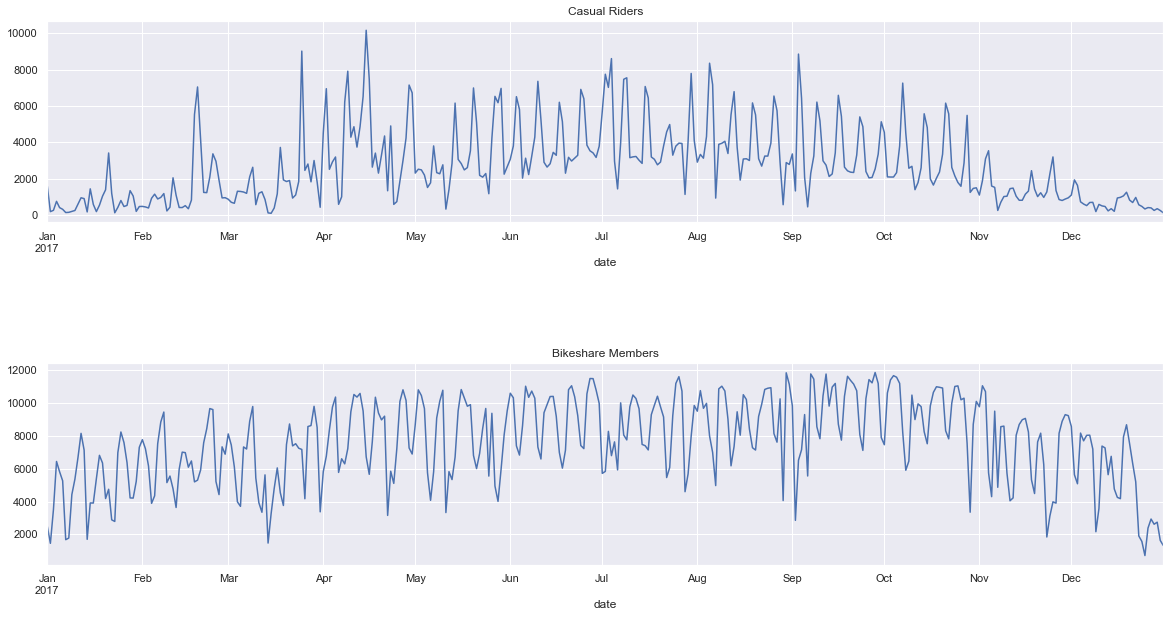

In [9]:
#importing libraries

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# Finding start date and set to sd1, set date and hour
sd1 = pd.DatetimeIndex(trips2017['Start date'])
trips2017['hour'] = sd1.hour
trips2017['date'] = sd1.date.astype('datetime64')


# Count trips in main data frame to plot for y axis 
cdate = trips2017.pivot_table('trip_id', aggfunc='count',
                            index='date',
                            columns='Member type', )

#plot sublots for each class, adjust spacing
fig, ax = plt.subplots (2, figsize=(20, 10))
fig.subplots_adjust(hspace=0.7)

#iloc to plot memebers and casual riders
cdate.iloc[:, 1].plot(ax=ax[1], title='Bikeshare Members');
cdate.iloc[:, 0].plot(ax=ax[0], title='Casual Riders');


**Observations:** We can see that the main difference throughout the year between both classes is the number of trips taken. The y axis shows the number of trips taken. We can also see that for casual riders, there are less frequent trips taken between the months Jan - Apr and Nov-Dec. This can be due to holiday season's. Conversely, there is a higher frequency of trips taken by members year round which gives us an indication that members do indeed use bikeshare as a viable means of transport for daily work commute. We will expand further in the report

At this stage, it would be interesting to observe by week, the average number of trips between the two user groups.

**Exploring Average Weekly Trips**

<Figure size 1440x720 with 0 Axes>

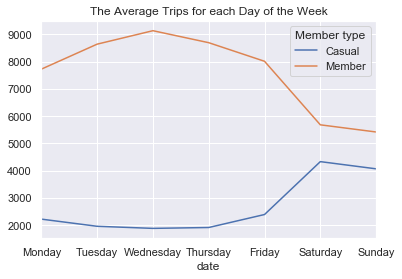

In [10]:
#
weekday = cdate.groupby([cdate.index.dayofweek]).mean()
week = cdate.groupby([cdate.index.week]).mean()


# plot the data
fig = plt.figure( figsize = (20,10),);
weekday.plot(title ='The Average Trips for each Day of the Week',);

#Set axes labels 
plt.gca().set_xticklabels(\
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);


**Observations:** An interesting trend to highlight here is the drop in trips made by member riders, and the increase for casual riders from friday. It is also interesting to see the gap in trips taken between the two classes. Following from these observations on trip frequency, we can identify which stations have the most frequent users, and try to get a better understanding between station locations and trip frequency. 

***
## Station Location Observations


Having done initial analysis on how members and casual riders differ in terms of ride time and distance, lets start to picture how these commute trips look geographically on a map. First we geo-code the station locations using the geopy library, to derive longitude and latitude information. For this project, the code has been adapted from the following published article found here: https://towardsdatascience.com/geocode-with-python-161ec1e62b89. 

We will be using the Nominatum Geocoding service that is built on top of Open Street Map. To do this we create a geocoding function that we pass for each station to give us the long, lat output. One thing to consider, is the incorrect addresses that may be returned. Because street names in the US are known to be used across many states, there could be instances where the function will return co-ordinates in another state. This can be seen visually on the map, because capital bikeshare is only availble in DC and surrounding sub-urban areas.

To over come this, we could also use the google API which will give us higher accuracy, however this will cost money and so for the purpose of this project geo-coder was used instead to get an initial view of bikeshare locations. We are only looking at journey's between stations for 2017, and so the total number of stations active in this calendar year is 486


In [11]:
import os
import glob
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

#create pandas df for q4 trips
q4 = pd.read_csv("2017Q4-capitalbikeshare-tripdata.csv" , parse_dates=['Start date' , 'End date'] ,
                       infer_datetime_format=True)

#printing first 10 rows for initial view
q4.head(10)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,197,2017-10-01 00:00:02,2017-10-01 00:03:19,31214,17th & Corcoran St NW,31229,New Hampshire Ave & T St NW,W21022,Member
1,434,2017-10-01 00:00:23,2017-10-01 00:07:38,31104,Adams Mill & Columbia Rd NW,31602,Park Rd & Holmead Pl NW,W00470,Member
2,955,2017-10-01 00:00:56,2017-10-01 00:16:52,31221,18th & M St NW,31103,16th & Harvard St NW,W20206,Member
3,461,2017-10-01 00:00:56,2017-10-01 00:08:37,31111,10th & U St NW,31102,11th & Kenyon St NW,W21014,Member
4,3357,2017-10-01 00:00:59,2017-10-01 00:56:56,31260,23rd & E St NW,31260,23rd & E St NW,W22349,Casual
5,2235,2017-10-01 00:01:06,2017-10-01 00:38:21,31260,23rd & E St NW,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,W21107,Casual
6,1177,2017-10-01 00:01:14,2017-10-01 00:20:51,31603,1st & M St NE,31259,20th St & Virginia Ave NW,W00708,Casual
7,470,2017-10-01 00:01:19,2017-10-01 00:09:09,31285,22nd & P ST NW,31201,15th & P St NW,W22460,Member
8,549,2017-10-01 00:02:01,2017-10-01 00:11:10,31102,11th & Kenyon St NW,31503,Florida Ave & R St NW,W00875,Member
9,481,2017-10-01 00:03:08,2017-10-01 00:11:10,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00492,Member


In [12]:
q4.shape

(815264, 9)

In [13]:
#dropping unnecesary columns and duplications of stations
qq1 = q4.drop_duplicates('Start station')
qq2 = q4.drop_duplicates('End station')
qq3 = q4.drop_duplicates('Bike number')

dropcols = ['Start station number', 'End station number', 'Bike number']
qq1.drop(labels=dropcols, axis='columns', inplace=True)
qq1.head(5)

/Users/yasminbuzari/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Duration,Start date,End date,Start station,End station,Member type
0,197,2017-10-01 00:00:02,2017-10-01 00:03:19,17th & Corcoran St NW,New Hampshire Ave & T St NW,Member
1,434,2017-10-01 00:00:23,2017-10-01 00:07:38,Adams Mill & Columbia Rd NW,Park Rd & Holmead Pl NW,Member
2,955,2017-10-01 00:00:56,2017-10-01 00:16:52,18th & M St NW,16th & Harvard St NW,Member
3,461,2017-10-01 00:00:56,2017-10-01 00:08:37,10th & U St NW,11th & Kenyon St NW,Member
4,3357,2017-10-01 00:00:59,2017-10-01 00:56:56,23rd & E St NW,23rd & E St NW,Casual


In [14]:
#checking final result for total numbers of station's to geocode
qq1.shape

(486, 6)

In [15]:
#using geo-coding to create longitude and latitude co-ordinates for each station
#importing libraries
import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

#specify geo-locater
geolocator = Nominatim(user_agent="BikeshareGeocoder")

#include function to delay geocoding calls, to overcome denied access by geocoding service provider
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

#create a location column in dataframe
qq1['location'] = qq1['Start station'].apply(geocode)

#create longitude, laatitude and altitude from location column, returning tuple
qq1['point'] = qq1['location'].apply(lambda loc: tuple(loc.point) if loc else None)

#split point column into latitude, longitude and altitude columns back into dataframe
qq1[['latitude', 'longitude', 'altitude']] = pd.DataFrame(qq1['point'].tolist(), index=qq1.index)

#observe dataframe with long, lats 
qq1.head(10)


/Users/yasminbuzari/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yasminbuzari/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yasminbuzari/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,Duration,Start date,End date,Start station,End station,Member type,location,point,latitude,longitude,altitude
0,197,2017-10-01 00:00:02,2017-10-01 00:03:19,17th & Corcoran St NW,New Hampshire Ave & T St NW,Member,"(17th & Corcoran St NW, 17th Street Northwest,...","(38.912083, -77.0386464, 0.0)",38.912083,-77.038646,0.0
1,434,2017-10-01 00:00:23,2017-10-01 00:07:38,Adams Mill & Columbia Rd NW,Park Rd & Holmead Pl NW,Member,"(Adams Mill and Columbia Rd NW, Columbia Road ...","(38.9230444, -77.0425553, 0.0)",38.923044,-77.042555,0.0
2,955,2017-10-01 00:00:56,2017-10-01 00:16:52,18th & M St NW,16th & Harvard St NW,Member,"(18th and M St NW, 18th Street Northwest, Gold...","(38.9047417, -77.041606, 0.0)",38.904742,-77.041606,0.0
3,461,2017-10-01 00:00:56,2017-10-01 00:08:37,10th & U St NW,11th & Kenyon St NW,Member,"(10th and U St NW, 10th Street Northwest, 9th ...","(38.9171997, -77.0259, 0.0)",38.917200,-77.025900,0.0
4,3357,2017-10-01 00:00:59,2017-10-01 00:56:56,23rd & E St NW,23rd & E St NW,Casual,"(23rd and E St NW, E Street Northwest, Penn Qu...","(38.8961214, -77.0497479, 0.0)",38.896121,-77.049748,0.0
6,1177,2017-10-01 00:01:14,2017-10-01 00:20:51,1st & M St NE,20th St & Virginia Ave NW,Casual,"(1st and M St NE, M Street Northeast, NoMa, Ne...","(38.9056997, -77.0056, 0.0)",38.905700,-77.005600,0.0
7,470,2017-10-01 00:01:19,2017-10-01 00:09:09,22nd & P ST NW,15th & P St NW,Member,"(22nd and P ST NW, 22nd Street Northwest, West...","(38.9094018, -77.0487303, 0.0)",38.909402,-77.048730,0.0
8,549,2017-10-01 00:02:01,2017-10-01 00:11:10,11th & Kenyon St NW,Florida Ave & R St NW,Member,"(11th and Kenyon St NW, 11th Street Northwest,...","(38.9294637, -77.027822, 0.0)",38.929464,-77.027822,0.0
9,481,2017-10-01 00:03:08,2017-10-01 00:11:10,11th & S St NW,1st & Rhode Island Ave NW,Member,"(11th and S St NW, 11th Street Northwest, Loga...","(38.9137688, -77.0270273, 0.0)",38.913769,-77.027027,0.0
10,504,2017-10-01 00:03:22,2017-10-01 00:11:46,California St & Florida Ave NW,New Hampshire Ave & 24th St NW,Member,"(California St and Florida Ave NW, California ...","(38.9177607, -77.04062, 0.0)",38.917761,-77.040620,0.0


In [16]:
#re-arranging columns
q1trips = qq1[['Duration', 'Start date','End date','Start station','location','latitude','longitude']]
q1trips.head(10)

,Duration,Start date,End date,Start station,location,latitude,longitude
0,197,2017-10-01 00:00:02,2017-10-01 00:03:19,17th & Corcoran St NW,"(17th & Corcoran St NW, 17th Street Northwest,...",38.912083,-77.038646
1,434,2017-10-01 00:00:23,2017-10-01 00:07:38,Adams Mill & Columbia Rd NW,"(Adams Mill and Columbia Rd NW, Columbia Road ...",38.923044,-77.042555
2,955,2017-10-01 00:00:56,2017-10-01 00:16:52,18th & M St NW,"(18th and M St NW, 18th Street Northwest, Gold...",38.904742,-77.041606
3,461,2017-10-01 00:00:56,2017-10-01 00:08:37,10th & U St NW,"(10th and U St NW, 10th Street Northwest, 9th ...",38.917200,-77.025900
4,3357,2017-10-01 00:00:59,2017-10-01 00:56:56,23rd & E St NW,"(23rd and E St NW, E Street Northwest, Penn Qu...",38.896121,-77.049748
6,1177,2017-10-01 00:01:14,2017-10-01 00:20:51,1st & M St NE,"(1st and M St NE, M Street Northeast, NoMa, Ne...",38.905700,-77.005600
7,470,2017-10-01 00:01:19,2017-10-01 00:09:09,22nd & P ST NW,"(22nd and P ST NW, 22nd Street Northwest, West...",38.909402,-77.048730
8,549,2017-10-01 00:02:01,2017-10-01 00:11:10,11th & Kenyon St NW,"(11th and Kenyon St NW, 11th Street Northwest,...",38.929464,-77.027822
9,481,2017-10-01 00:03:08,2017-10-01 00:11:10,11th & S St NW,"(11th and S St NW, 11th Street Northwest, Loga...",38.913769,-77.027027
10,504,2017-10-01 00:03:22,2017-10-01 00:11:46,California St & Florida Ave NW,"(California St and Florida Ave NW, California ...",38.917761,-77.040620


Assuming that some of the station's were returned blank due to geo-coding error call, lets see the number of these stations so we can exclude them from our final data frame

In [17]:
q1trips.isnull().sum()

Duration          0
Start date        0
End date          0
Start station     0
location         50
latitude         50
longitude        50
dtype: int64

It looks like we have 50 station's that were returned null, ideally we would obtain the long and lat's for these, however for the purpose of this assignment to observe 436 stations will suffice. Future work would use the google API to derive long, lats.

In [18]:
#dropping null long and lats
q1trips=q1trips.dropna(subset=['longitude'])
q1trips=q1trips.dropna(subset=['latitude'])

#re-checking
q1trips.isnull().sum()

Duration         0
Start date       0
End date         0
Start station    0
location         0
latitude         0
longitude        0
dtype: int64

In [19]:
#import folium and fastmarker cluster for station clustering
import folium 
from folium.plugins import FastMarkerCluster
#set default co-ordinates to washington DC
folium_map = folium.Map(location=[38.9, -77.05],
                        zoom_start=12,
                        tiles='CartoDB dark_matter')

#cluster station lat, longs and map 
FastMarkerCluster(data=list(zip(q1trips['latitude'].values, q1trips['longitude'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map

**Observations:** Because of the large number of stations, we have used FastMarkerCluster to cluster stations together. This lets us observe hot-spot area's in Washington to compare against stations situated in sub-urban areas. Overall, this gives an idea of how capital bikeshare have chosen to implement their scheme, both as an inter-city and outer-city model to accomodate for commuters and recreational riders. 

**Merging geo-coded stations to main data frame to use for mapping popular stations**

In [20]:
final = trips2017.merge(q1trips, on="Start station", how='inner')

#final=final.dropna(subset=['Duration_y'])

#dropping unnecesary columns duplicated by merge 
f1 = final.drop_duplicates('Duration_y')
f2 = final.drop_duplicates('Start date_y')
f3 = final.drop_duplicates('End date_y')

dropcols = ['Duration_y', 'Start date_y', 'End date_y']
final.drop(labels=dropcols, axis='columns', inplace=True)
final.head(5)

,Duration_x,Start date_x,End date_x,Start station number,Start station,End station number,End station,Bike number,Member type,minutes,trip_id,hour,date,location,latitude,longitude
0,221,2017-01-01 00:00:41,2017-01-01 00:04:23,31634,3rd & Tingey St SE,31208,M St & New Jersey Ave SE,W00869,Member,3.683333,1,0,2017-01-01,"(3rd and Tingey St SE, Tingey Street Southeast...",38.875018,-77.002402
1,799,2017-01-01 11:54:18,2017-01-01 12:07:37,31634,3rd & Tingey St SE,31612,D St & Maryland Ave NE,W21871,Member,13.316667,832,11,2017-01-01,"(3rd and Tingey St SE, Tingey Street Southeast...",38.875018,-77.002402
2,791,2017-01-01 11:54:29,2017-01-01 12:07:41,31634,3rd & Tingey St SE,31612,D St & Maryland Ave NE,W22877,Member,13.183333,837,11,2017-01-01,"(3rd and Tingey St SE, Tingey Street Southeast...",38.875018,-77.002402
3,178,2017-01-01 12:16:49,2017-01-01 12:19:48,31634,3rd & Tingey St SE,31628,1st & K St SE,W22794,Member,2.966667,943,12,2017-01-01,"(3rd and Tingey St SE, Tingey Street Southeast...",38.875018,-77.002402
4,97,2017-01-01 15:34:41,2017-01-01 15:36:19,31634,3rd & Tingey St SE,31634,3rd & Tingey St SE,W00382,Member,1.616667,2547,15,2017-01-01,"(3rd and Tingey St SE, Tingey Street Southeast...",38.875018,-77.002402


In [21]:
final.shape

(3547930, 16)

### Station Analysis

Here we begin to look at popular start and end station's, we have mapped start and end station's using folium to visually identify where commuters originate and end their journey's. Further analysis will look at popular trip combinations. 

In [22]:
#Grouping start station's for count
mainstart = final.groupby('Start station')['Start station'].count().sort_values(ascending=False)

mainstart.head(10)

Start station
Columbus Circle / Union Station                        70062
Lincoln Memorial                                       65884
Jefferson Dr & 14th St SW                              59259
Massachusetts Ave & Dupont Circle NW                   46702
15th & P St NW                                         43305
Jefferson Memorial                                     42525
Henry Bacon Dr & Lincoln Memorial Circle NW            40659
4th St & Madison Dr NW                                 37751
14th & V St NW                                         33159
Eastern Market Metro / Pennsylvania Ave & 7th St SE    32404
Name: Start station, dtype: int64

In [23]:
#create df for popular stations 
data = [['Columbus Circle / Union Station'] , ['Lincoln Memorial'] , ['Jefferson Dr & 14th St SW '] , ['Massachusetts Ave & Dupont Circle NW'],
       ['15th & P St NW'], ['Jefferson Memorial'] , ['Henry Bacon Dr & Lincoln Memorial Circle NW  '] , 
       ['4th St & Madison Dr NW '] , ['14th & V St NW'] ,['Eastern Market Metro / Pennsylvania Ave & 7th St SE']]
data1= pd.DataFrame(data, columns = ['station'])


**Mapping popular start and end stations using folium**

In [24]:
#specify geolocator
geolocator = Nominatim(user_agent="BikeshareGeocoder")

data1['location'] = data1
#include function to delay geocoding calls, to overcome denied access by geocoding service provider
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

#create a location column in dataframe
data1['location'] = data1['station'].apply(geocode)

#create longitude, laatitude and altitude from location column, returning tuple
data1['point'] = data1['location'].apply(lambda loc: tuple(loc.point) if loc else None)

#split point column into latitude, longitude and altitude columns and return to dataframe
data1[['latitude', 'longitude', 'altitude']] = pd.DataFrame(data1['point'].tolist(), index=data1.index)


In [25]:
#using the same specifics, map station
folium_map = folium.Map(location=[38.9, -77.05],
                        zoom_start=12,
                        tiles='CartoDB dark_matter')


FastMarkerCluster(data=list(zip(data1['latitude'].values, q1trips['longitude'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map

In [26]:
#calculating end stations
mainend = final.groupby('End station')['End station'].count().sort_values(ascending=False)
mainend.head(5)

End station
Columbus Circle / Union Station         71508
Jefferson Dr & 14th St SW               55682
Lincoln Memorial                        54993
Massachusetts Ave & Dupont Circle NW    49531
15th & P St NW                          45488
Name: End station, dtype: int64

In [27]:
#combining start and end station combination's
combining = final.copy()
combining = combining[['Start station', 'End station']]
combining['Combo'] = combining['Start station'] + ' + ' + combining['End station']
combining.head()

,Start station,End station,Combo
0,3rd & Tingey St SE,M St & New Jersey Ave SE,3rd & Tingey St SE + M St & New Jersey Ave SE
1,3rd & Tingey St SE,D St & Maryland Ave NE,3rd & Tingey St SE + D St & Maryland Ave NE
2,3rd & Tingey St SE,D St & Maryland Ave NE,3rd & Tingey St SE + D St & Maryland Ave NE
3,3rd & Tingey St SE,1st & K St SE,3rd & Tingey St SE + 1st & K St SE
4,3rd & Tingey St SE,3rd & Tingey St SE,3rd & Tingey St SE + 3rd & Tingey St SE


In [28]:
#Calculating number of combination instances from above calculations
maincombo = combining.groupby('Combo')['Combo'].count().sort_values(ascending=False)
maincombo.head(20)

Combo
Jefferson Dr & 14th St SW + Jefferson Dr & 14th St SW                                                  7458
Lincoln Memorial + Jefferson Memorial                                                                  7166
Jefferson Dr & 14th St SW + Lincoln Memorial                                                           6368
Lincoln Memorial + Lincoln Memorial                                                                    5193
Lincoln Memorial + Jefferson Dr & 14th St SW                                                           5173
Columbus Circle / Union Station + 8th & F St NE                                                        4145
Jefferson Memorial + Lincoln Memorial                                                                  4029
8th & F St NE + Columbus Circle / Union Station                                                        3862
4th St & Madison Dr NW + 4th St & Madison Dr NW                                                        3851
Lincoln Memorial + Smi

This finding can be interesting for bikeshare schemes, because micro-mobility depends a lot on user satisfaction and ease, by making sure adequate bikes are docked this can enhance the user experience and therefore create more popularity for bikeshare schemes. As a result, it can also attract casual riders to pay for membership. This is the goal of micro-mobility schemes in general to attract more frequent users both for casual and commuting trips. 

## Trip Duration Comparison: Annual and Casual Members

Finally, we look at averaged trips taken between members and casual riders and their duration, this will help us understand whether users typically use bikeshare schemes for longer or shorter distances. 

/Users/yasminbuzari/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


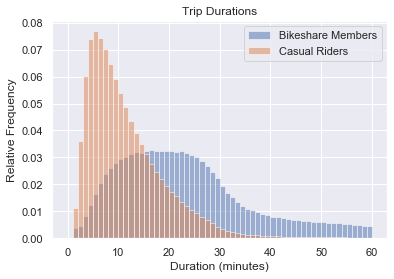

In [29]:
#convert trip duration feature to minutes 
trips2017['minutes'] = trips2017.Duration / 60 


#specify groups by member type and minutes to plot graph
trips2017.groupby('Member type')['minutes'].hist(bins=np.arange(61), alpha=0.5, normed=True);
plt.xlabel('Duration (minutes)')
plt.ylabel('Relative Frequency')
plt.title('Trip Durations')

plt.legend(['Bikeshare Members', 'Casual Riders'])


Comment: We can observe a typical bike trip in minutes against the frequency. Again this highlights an initial observation made that annual members commute longer distances, with less frequency. So for example, during the work week a single individual would take an out and back journey covering a larger distance, where as a casual rider may take multiple journey's at shorter distances. To graph the plot above, inferences were made from this source: https://jakevdp.github.io/

**Observing trip average by hour on weekday and weekends**

We can now take an even closer look on an hourly basis, this gives us insight whether we can assume that casual rider trips exceed members during weekends

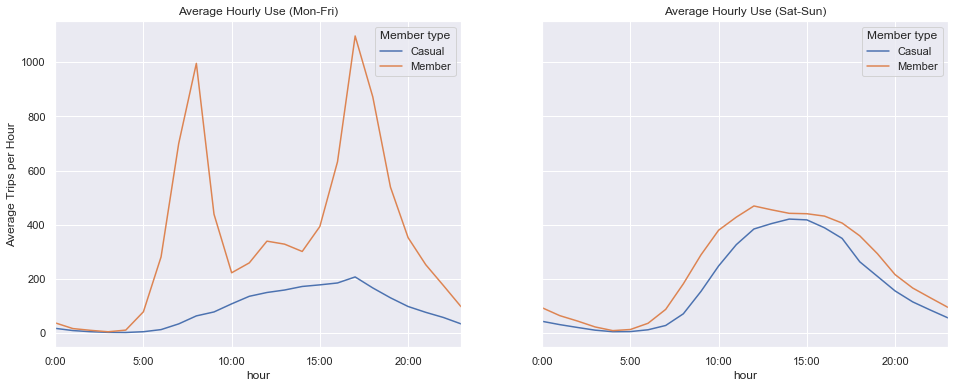

In [31]:
# count trips by date and by hour
hr = trips2017.pivot_table('trip_id', aggfunc='count',
                            index=['date', 'hour'],
                            columns='Member type').fillna(0).reset_index('hour')

# average these counts by weekend
hr['weekend'] = (hr.index.dayofweek >= 5)
hr = hr.groupby(['weekend', 'hour']).mean()
hr.index.set_levels([['weekday', 'weekend'],
                          ["{0}:00".format(i) for i in range(24)]],
                         inplace=True);


#plot graphs
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
hr.loc['weekday'].plot(title='Average Hourly Use (Mon-Fri)', ax=ax[0])
hr.loc['weekend'].plot(title='Average Hourly Use (Sat-Sun)', ax=ax[1])
ax[0].set_ylabel('Average Trips per Hour');

We can observe a difference here in peaks for members, showing commuting patterns that fit within the work day with peaks in the mornings and evenings. For casual riders, fewer trips elongated throughout the day show a more recreational usem with its highest peak in the afternoon. To graph the following plots, inferences were made from this source: https://jakevdp.github.io/

Word Count: 1,386